In [573]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [574]:
df = pd.read_csv('../data/MPS/agg_filtered_boroughs_weekends.csv')

In [575]:
df['TimePeriod'] = pd.to_datetime(df['TimePeriod'])

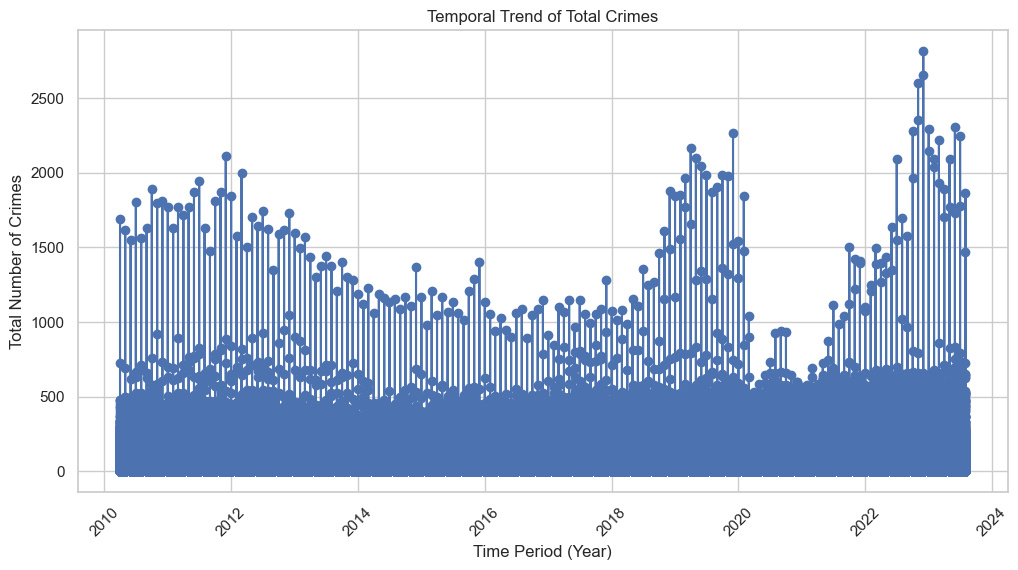

In [576]:
plt.figure(figsize=(12, 6))
plt.plot(df['TimePeriod'], df['Value'], marker='o', linestyle='-', color='b')
plt.title('Temporal Trend of Total Crimes')
plt.xlabel('Time Period (Year)')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [577]:
df.set_index('TimePeriod', inplace=True)

In [578]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [579]:
monthly_crime_data = df.groupby(['Year', 'Month']).sum()

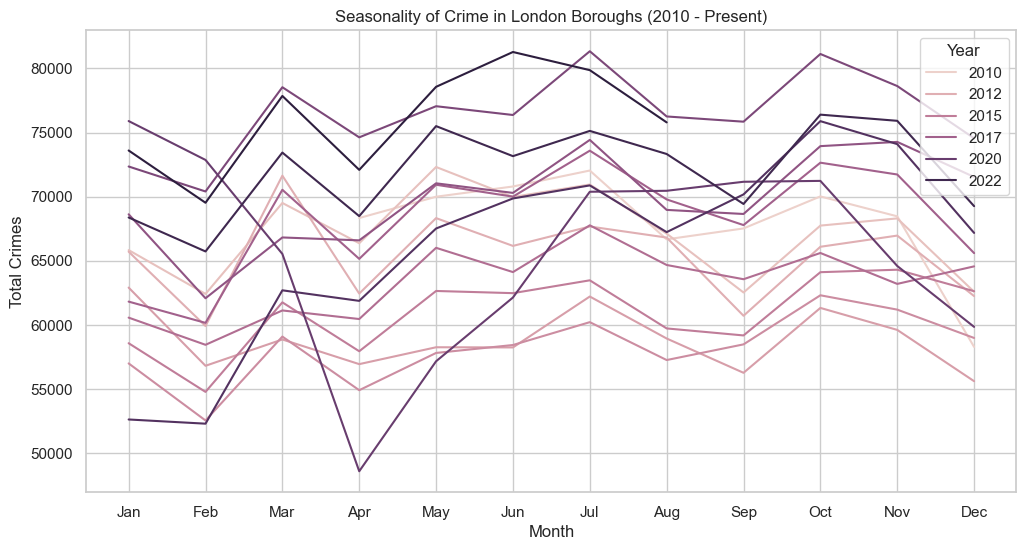

In [580]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Value', hue='Year', data=monthly_crime_data)
plt.title('Seasonality of Crime in London Boroughs (2010 - Present)')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.show()

In [581]:
crime_seasonality = df.groupby(['CrimeType', 'Month'])['Value'].mean().reset_index()
crime_seasonality_pivot = crime_seasonality.pivot(index='Month', columns='CrimeType', values='Value')

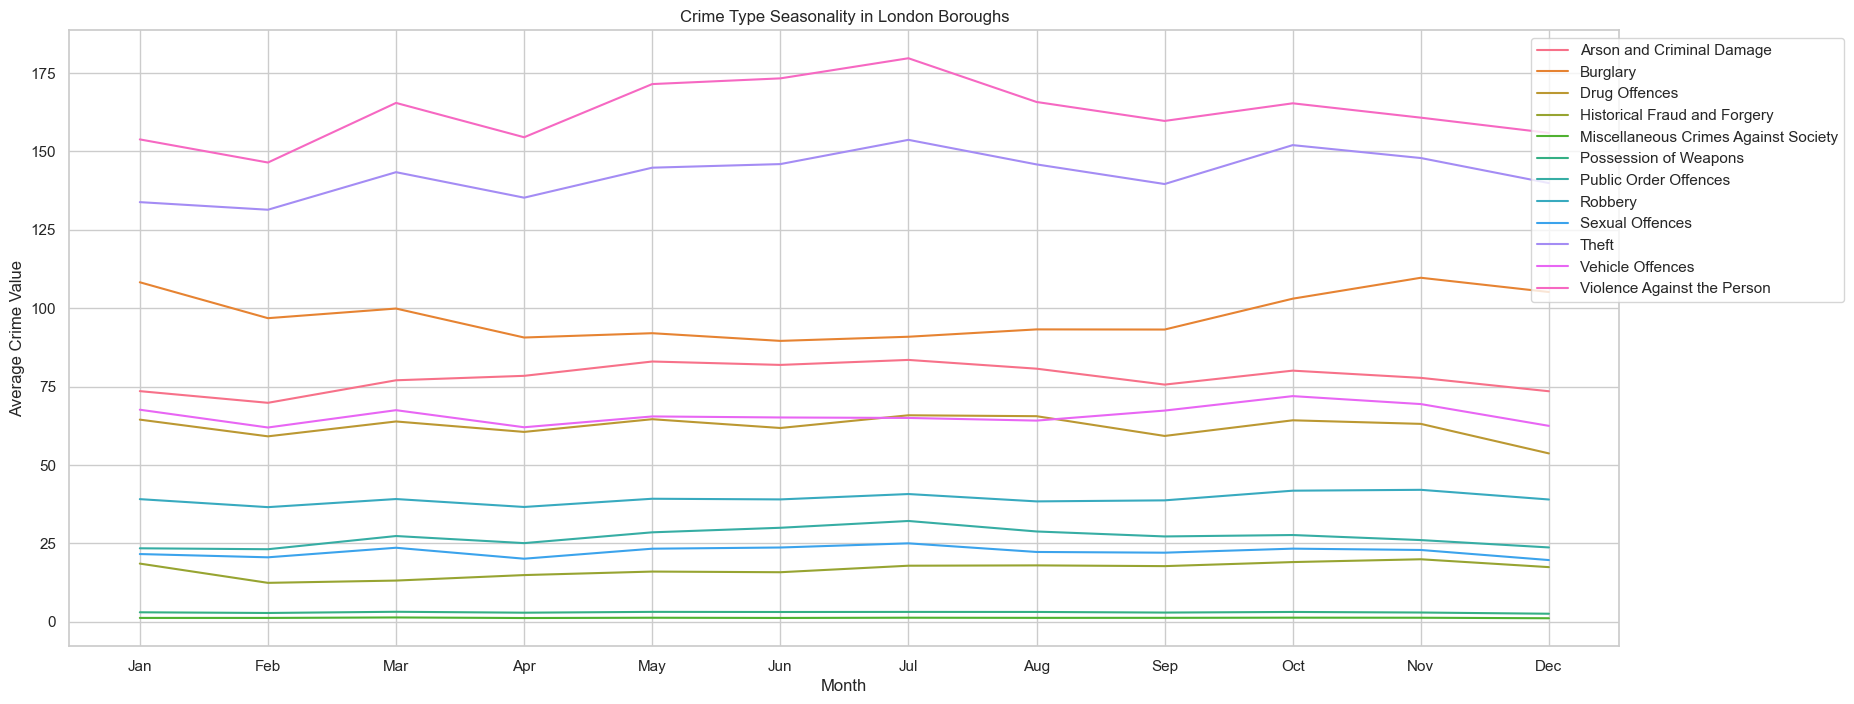

In [582]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.lineplot(data=crime_seasonality_pivot, dashes=False)
plt.title('Crime Type Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [583]:
sub_crime_seasonality = df.groupby(['CrimeSubtype', 'Month'])['Value'].mean().reset_index()
sub_crime_seasonality_pivot = sub_crime_seasonality.pivot(index='Month', columns='CrimeSubtype', values='Value')

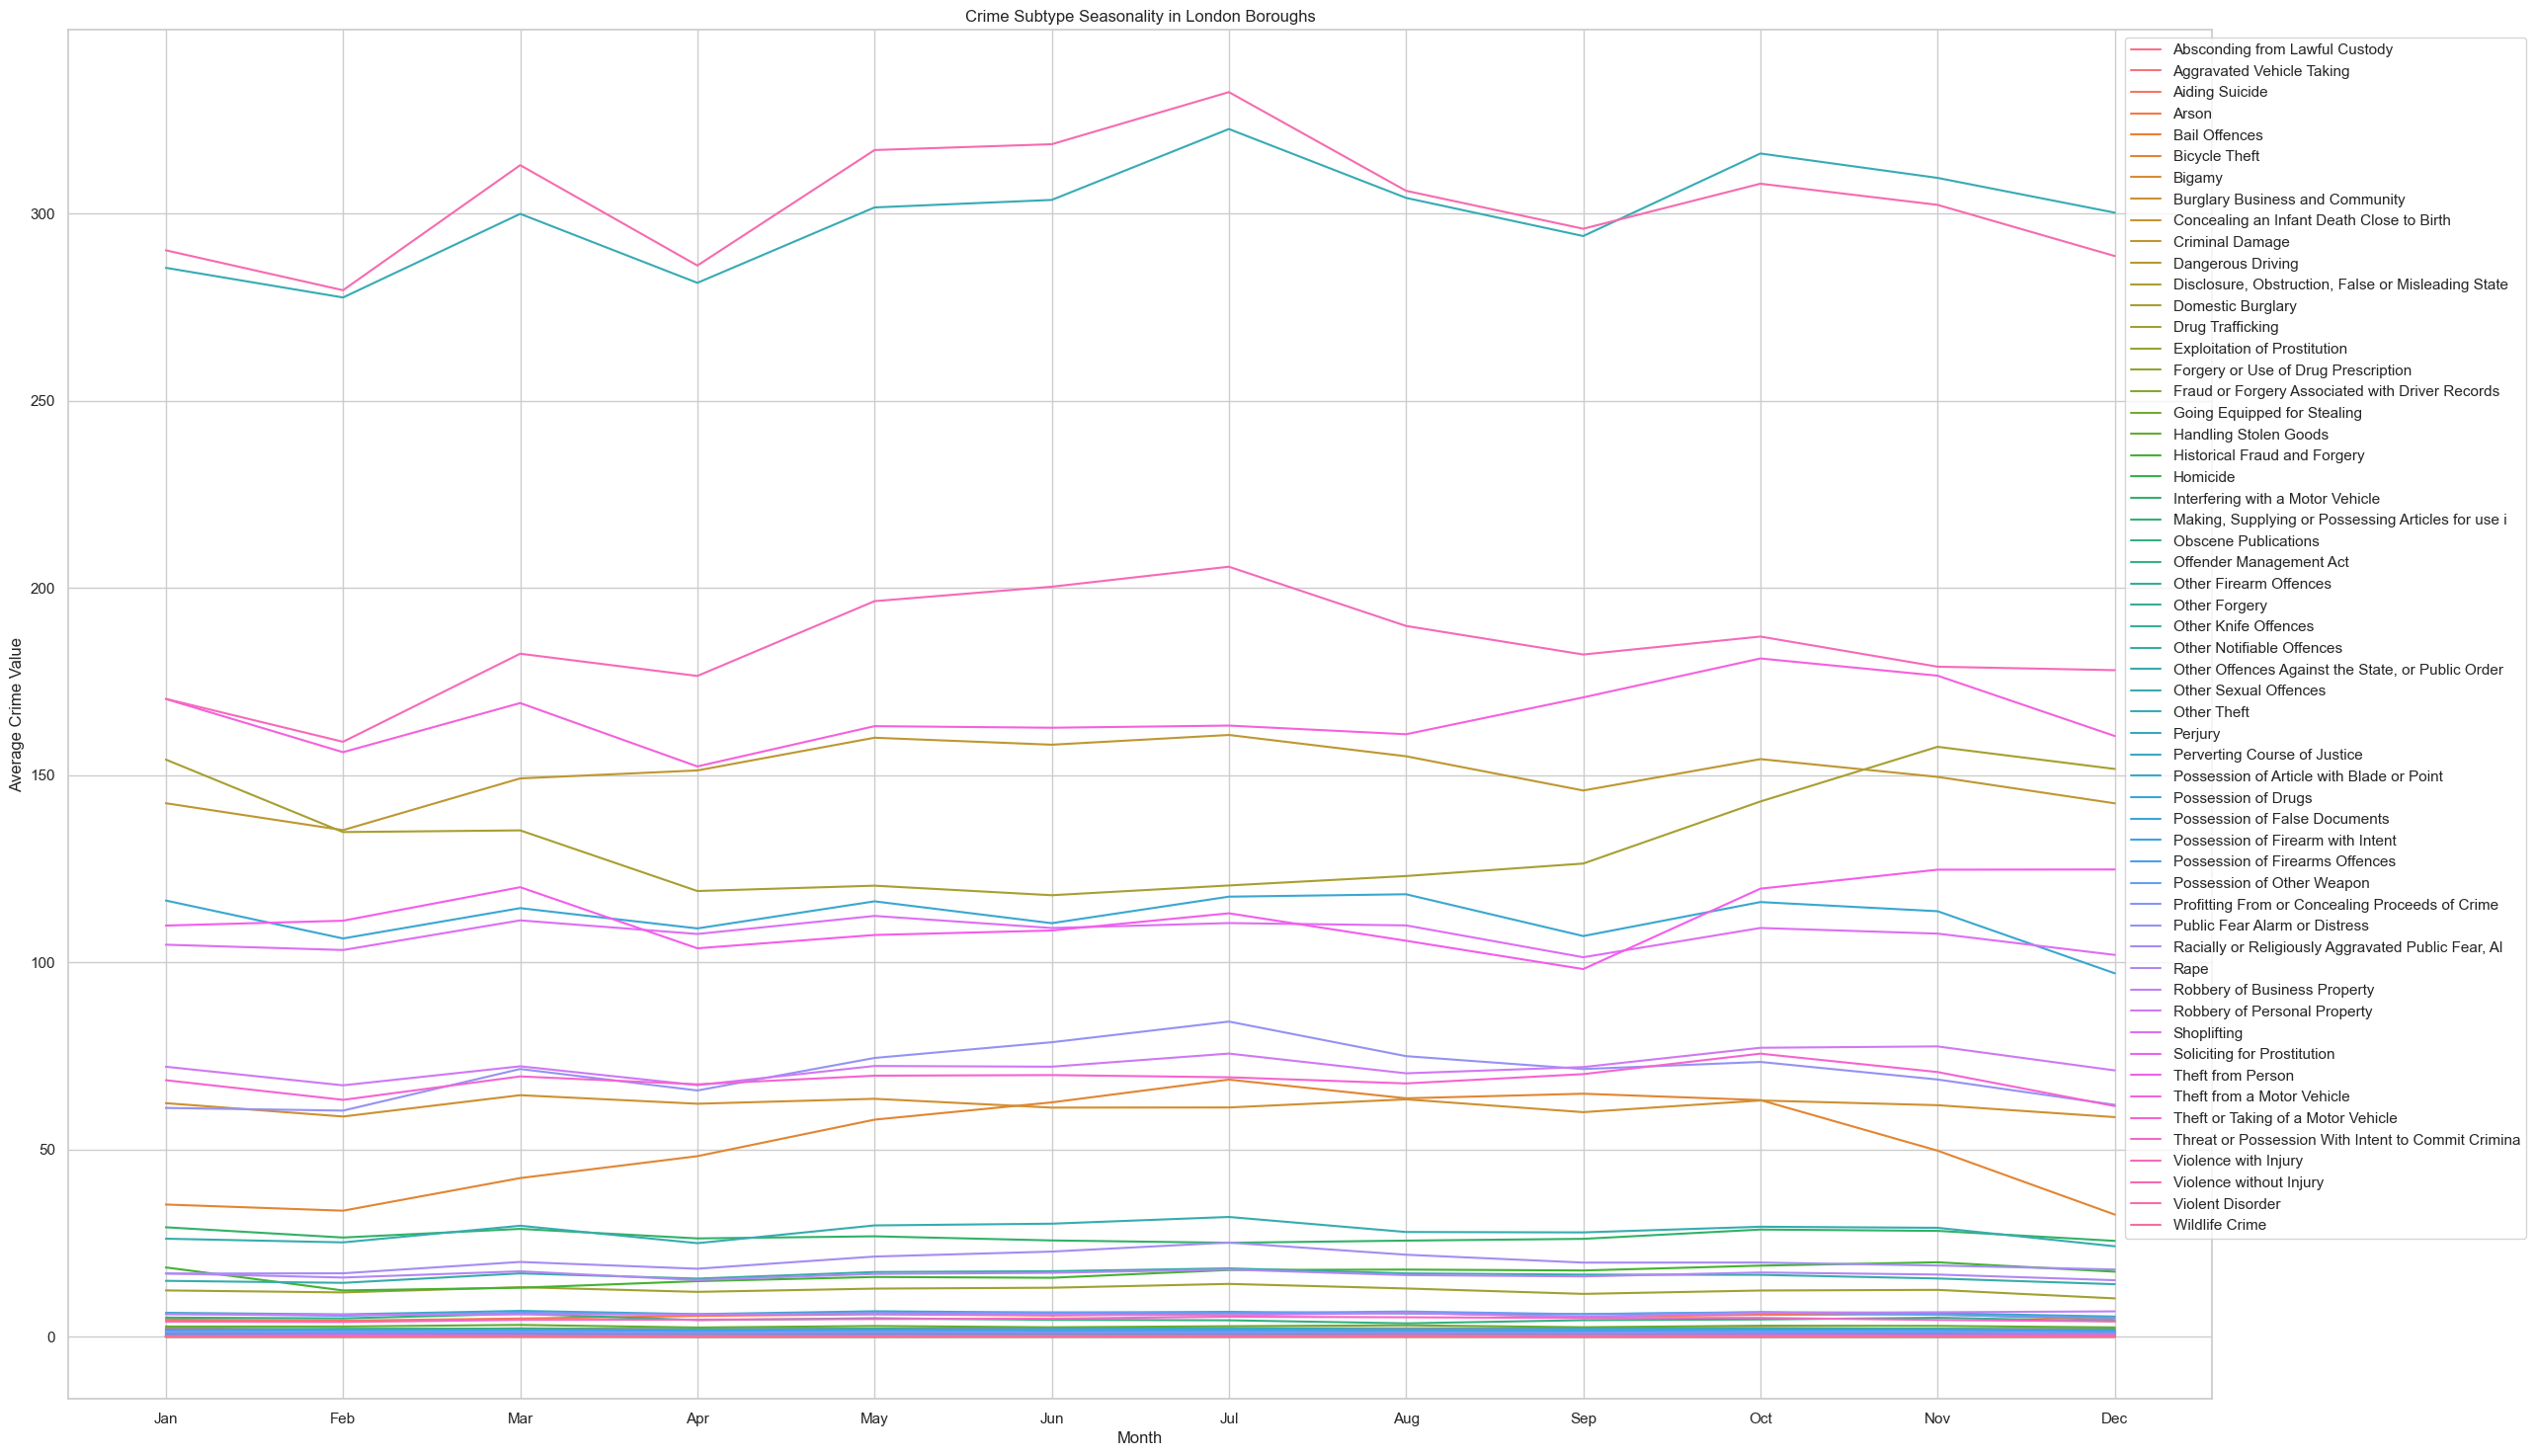

In [584]:
plt.figure(figsize=(28, 18))
sns.set(style="whitegrid")
sns.lineplot(data=sub_crime_seasonality_pivot, dashes=False)
plt.title('Crime Subtype Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [585]:
borough_crime_rates = df.groupby('BoroughName')['Value'].mean().reset_index()
borough_crime_rates_sorted = borough_crime_rates.sort_values(by='Value')

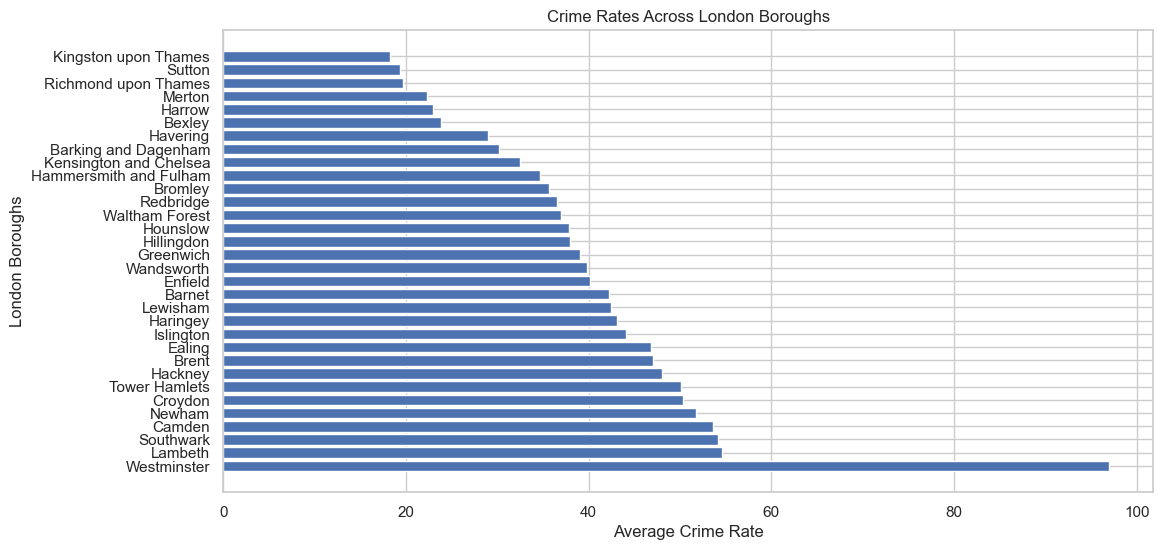

In [586]:
plt.figure(figsize=(12, 6))
plt.barh(borough_crime_rates_sorted['BoroughName'], borough_crime_rates_sorted['Value'])
plt.xlabel('Average Crime Rate')
plt.ylabel('London Boroughs')
plt.title('Crime Rates Across London Boroughs')
plt.gca().invert_yaxis() 
plt.show()

In [587]:
highest_crime_rate = borough_crime_rates_sorted['Value'].max()
lowest_crime_rate = borough_crime_rates_sorted['Value'].min()

highest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == highest_crime_rate]
lowest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == lowest_crime_rate]

print("Boroughs with the highest crime rate:")
print(highest_crime_boroughs)

print("\nBoroughs with the lowest crime rate:")
print(lowest_crime_boroughs)

Boroughs with the highest crime rate:
    BoroughName      Value
31  Westminster  96.990422

Boroughs with the lowest crime rate:
             BoroughName      Value
19  Kingston upon Thames  18.277589


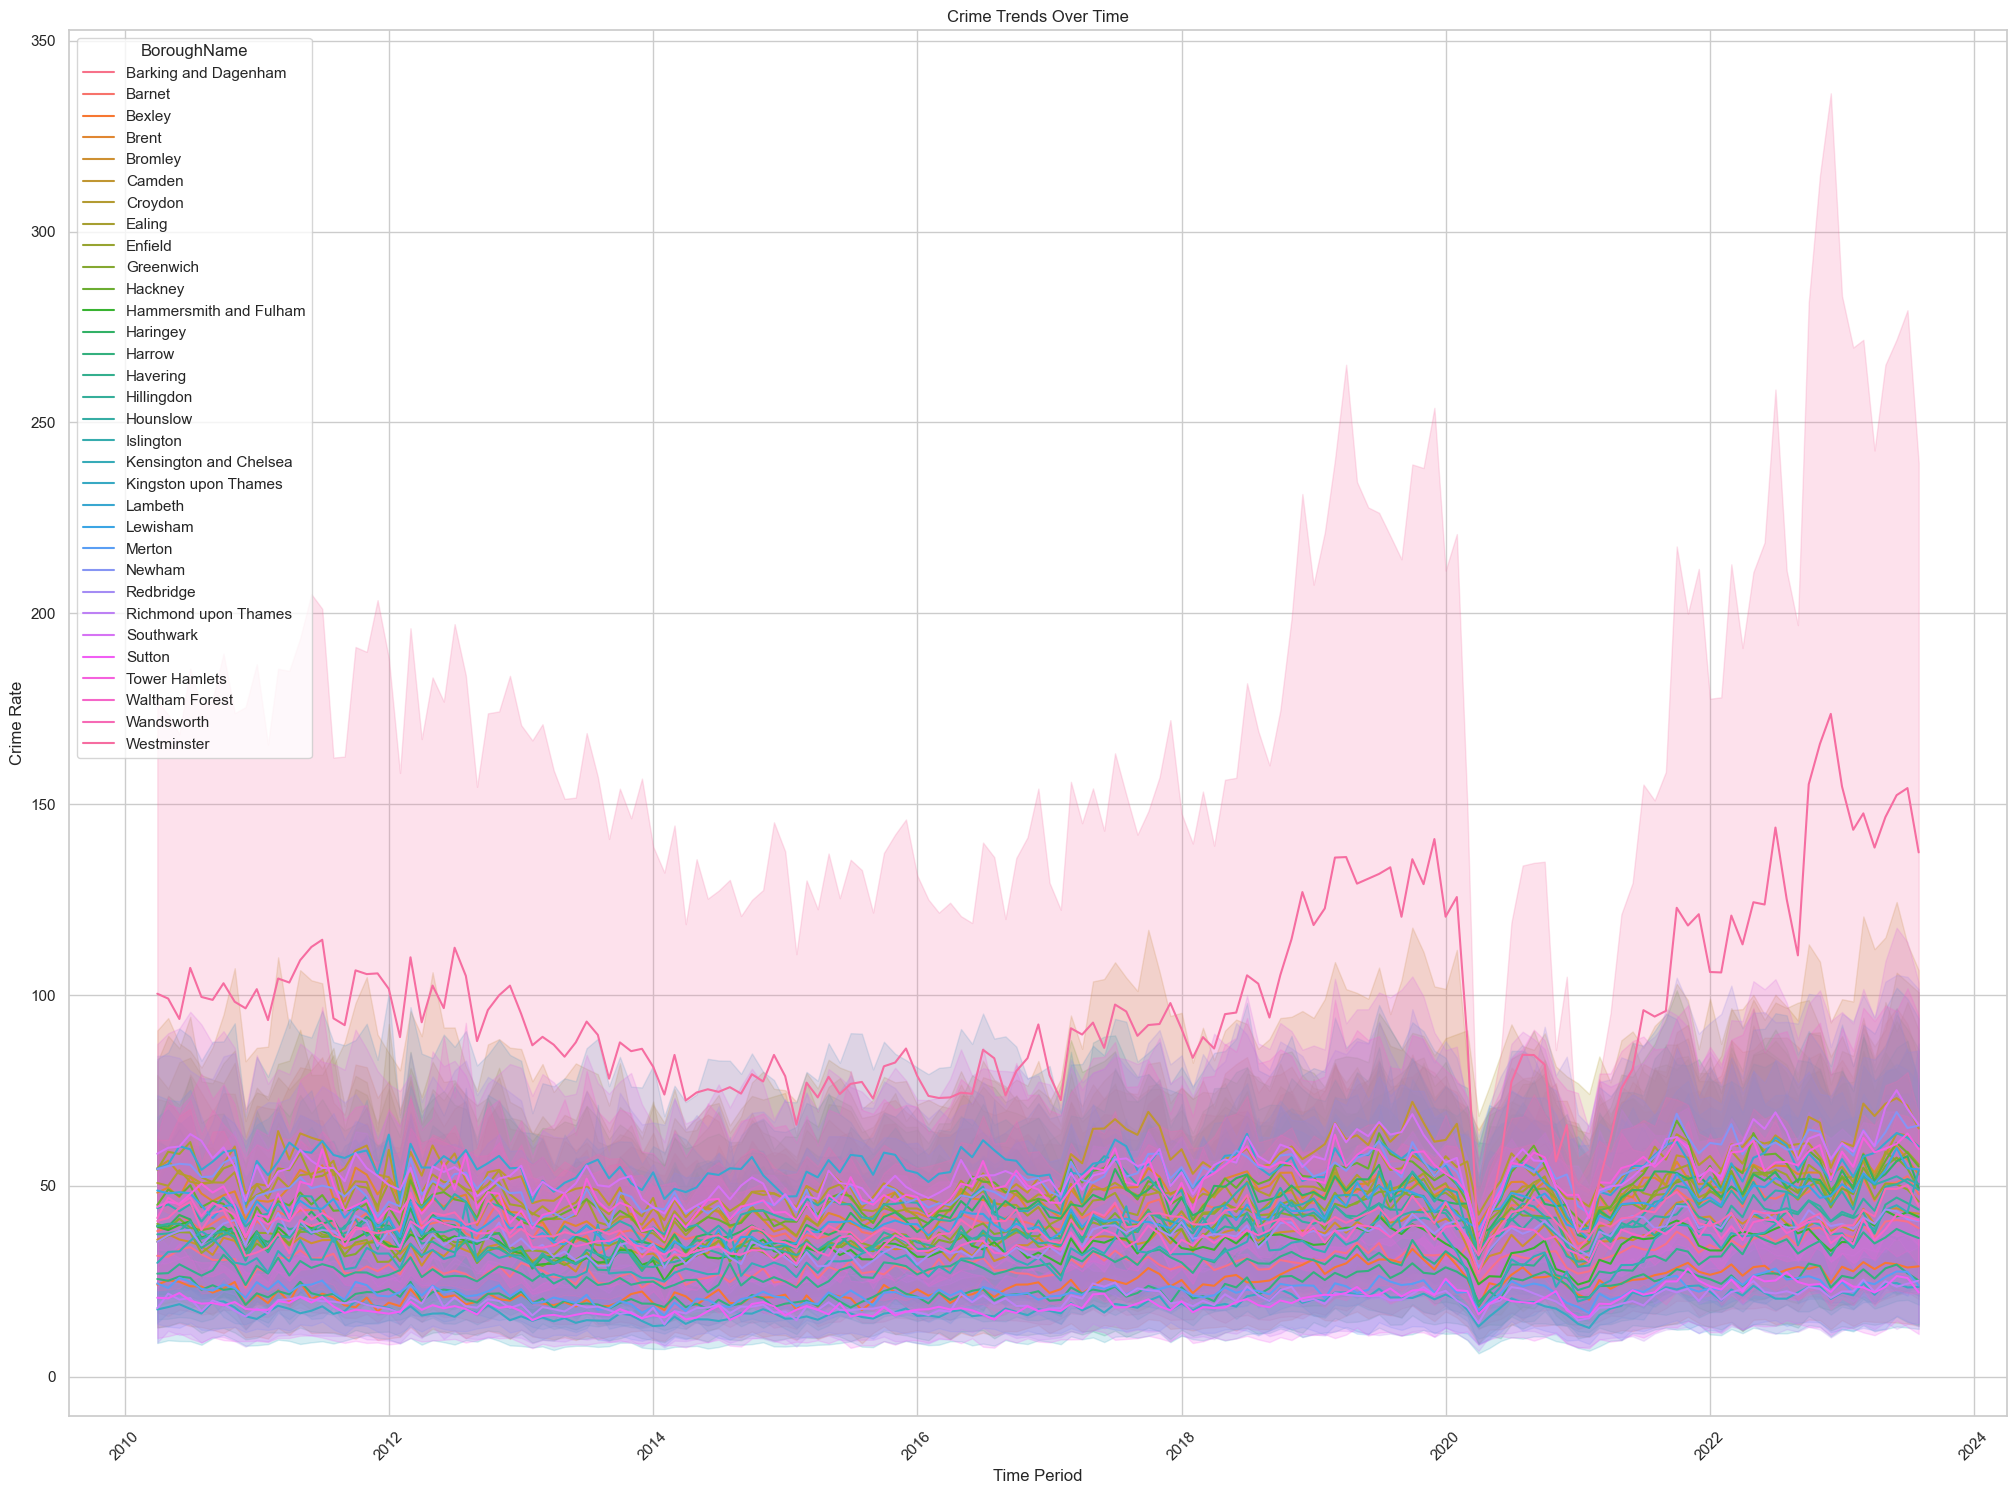

In [588]:
plt.figure(figsize=(25, 18))
sns.lineplot(data=df, x='TimePeriod', y='Value', hue='BoroughName')
plt.title('Crime Trends Over Time')
plt.xlabel('Time Period')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)
plt.show()

/Users/yulia/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


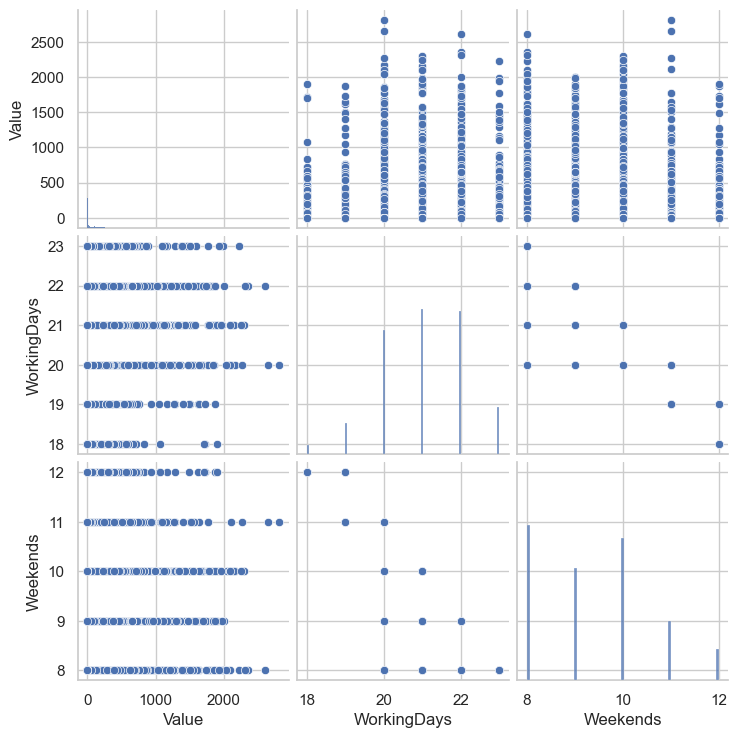

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     26.49
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           3.14e-12
Time:                        15:53:15   Log-Likelihood:            -1.5742e+06
No. Observations:              266921   AIC:                         3.148e+06
Df Residuals:                  266918   BIC:                         3.148e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.2331      6.573     -0.492      

In [589]:
sns.pairplot(df[['Value', 'WorkingDays', 'Weekends']])
plt.show()
model = smf.ols('Value ~ WorkingDays + Weekends', data=df).fit()
print(model.summary())

In [590]:
hypothesis_test = model.t_test("WorkingDays = 0")
print("Hypothesis Test for WorkingDays:\n", hypothesis_test)

hypothesis_test = model.t_test("Weekends = 0")
print("Hypothesis Test for Weekends:\n", hypothesis_test)

Hypothesis Test for WorkingDays:
                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.6367      0.231      7.087      0.000       1.184       2.089
Hypothesis Test for Weekends:
                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9558      0.219      4.366      0.000       0.527       1.385


In [591]:
borough_of_interest = 'Westminster'

borough_data = df[df['BoroughName'] == borough_of_interest]

weekdays_data = borough_data[borough_data['WorkingDays'] == 1]
weekends_data = borough_data[borough_data['Weekends'] == 1]

t_stat, p_value = stats.ttest_ind(weekdays_data['Value'], weekends_data['Value'], equal_var=False)

if p_value < 0.05:
    print(f'The difference in crime rates between weekdays and weekends in {borough_of_interest} is statistically significant (p-value={p_value:.4f}).')
else:
    print(f'The difference in crime rates between weekdays and weekends in {borough_of_interest} is not statistically significant (p-value={p_value:.4f}).')

The difference in crime rates between weekdays and weekends in Westminster is not statistically significant (p-value=nan).


## Adding new features and removing insignificant

In [592]:
data = df.drop(columns=['WorkingDays', 'Weekends'])

In [593]:
data['YearlyTrend_Value'] = data.groupby(['BoroughName', 'CrimeType', 'CrimeSubtype', 'Month'])['Value'].transform('mean')

data

,BoroughName,CrimeType,CrimeSubtype,Value,Year,Month,YearlyTrend_Value
TimePeriod,,,,,,,
2010-04-01,Barking and Dagenham,Arson and Criminal Damage,Arson,6,2010,4,5.785714
2010-04-01,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,208,2010,4,130.642857
2010-04-01,Barking and Dagenham,Burglary,Burglary Business and Community,49,2010,4,37.500000
2010-04-01,Barking and Dagenham,Burglary,Domestic Burglary,118,2010,4,93.500000
2010-04-01,Barking and Dagenham,Drug Offences,Drug Trafficking,9,2010,4,8.928571
...,...,...,...,...,...,...,...
2023-08-01,Westminster,Vehicle Offences,Theft from a Motor Vehicle,224,2023,8,209.857143
2023-08-01,Westminster,Vehicle Offences,Theft or Taking of a Motor Vehicle,60,2023,8,59.142857
2023-08-01,Westminster,Violence Against the Person,Homicide,0,2023,8,0.500000


# Explore and transform NOMIS data

In [594]:
nomis = pd.read_csv('../data/MPS/nomis_data.tsv', sep='\t')
nomis = nomis.drop('Confidence', axis=1) # remove the 'Confidence' column
nomis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787472 entries, 0 to 787471
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        787472 non-null  object
 1   Area        787472 non-null  object
 2   variable    787472 non-null  object
 3   value type  787472 non-null  object
 4   value       693188 non-null  object
 5   flag        94284 non-null   object
dtypes: object(6)
memory usage: 36.0+ MB


In [595]:
# check if we have monthly or yearly data
unique_dates = nomis['Date'].unique() 
for date in unique_dates:
    print(date)

Apr 2009-Mar 2010
Apr 2010-Mar 2011
Apr 2011-Mar 2012
Apr 2012-Mar 2013
Apr 2013-Mar 2014
Apr 2014-Mar 2015
Apr 2015-Mar 2016
Apr 2016-Mar 2017
Apr 2017-Mar 2018
Apr 2018-Mar 2019
Apr 2019-Mar 2020
Apr 2020-Mar 2021
Apr 2021-Mar 2022
Apr 2022-Mar 2023


In [596]:
# create custom fumction to transform 'Date' column, 
# so data represented as '2010-03' instead of 'Apr 2009-Mar 2010'
def transform_date(date_str):
    date_range = date_str.split('-')
    end_date = date_range[1].split(' ')

    end_year = end_date[1]
    end_month = end_date[0][:3]

    transformed_date = f"{end_year}-{pd.to_datetime(end_month, format='%b').month:02d}"
    return transformed_date

# apply transformation to the 'Date' column
nomis['Date'] = nomis['Date'].apply(transform_date)


In [597]:
nomis.head(20)

,Date,Area,variable,value type,value,flag
0,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white UK born,Numerator,98800,NaN
1,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white UK born,Denominator,177400,NaN
2,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white UK born,Percent,55.7,NaN
3,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white UK born,Conf,5.0,NaN
4,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white not UK ...,Numerator,13800,NaN
5,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white not UK ...,Denominator,177400,NaN
6,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white not UK ...,Percent,7.8,NaN
7,2010-03,ualad09:Barking and Dagenham,Percentage of population who are white not UK ...,Conf,2.7,NaN
8,2010-03,ualad09:Barking and Dagenham,Percentage of population who are ethnic minori...,Numerator,21500,NaN
9,2010-03,ualad09:Barking and Dagenham,Percentage of population who are ethnic minori...,Denominator,177400,NaN


In [598]:
# check how 'Area' column represented
unique_area = nomis['Area'].unique()
for area in unique_area:
    print(area)

ualad09:Barking and Dagenham
lacu:Barking and Dagenham
lacu:Barnet
lacu:Bexley
lacu:Brent
lacu:Bromley
lacu:Camden
lacu:City of London
lacu:Croydon
lacu:Ealing
lacu:Enfield
lacu:Greenwich
lacu:Hackney
lacu:Hammersmith and Fulham
lacu:Haringey
lacu:Harrow
lacu:Havering
lacu:Hillingdon
lacu:Hounslow
lacu:Islington
lacu:Kensington and Chelsea
lacu:Kingston upon Thames
lacu:Lambeth
lacu:Lewisham
lacu:Merton
lacu:Newham
lacu:Redbridge
lacu:Richmond upon Thames
lacu:Southwark
lacu:Sutton
lacu:Tower Hamlets
lacu:Waltham Forest
lacu:Wandsworth
lacu:Westminster
ladu:Barking and Dagenham
ladu:Barnet
ladu:Bexley
ladu:Brent
ladu:Bromley
ladu:Camden
ladu:City of London
ladu:Croydon
ladu:Ealing
ladu:Enfield
ladu:Greenwich
ladu:Hackney
ladu:Hammersmith and Fulham
ladu:Haringey
ladu:Harrow
ladu:Havering
ladu:Hillingdon
ladu:Hounslow
ladu:Islington
ladu:Kensington and Chelsea
ladu:Kingston upon Thames
ladu:Lambeth
ladu:Lewisham
ladu:Merton
ladu:Newham
ladu:Redbridge
ladu:Richmond upon Thames
ladu:South

In [599]:
nomis['Area'] = nomis['Area'].str.split(':').str[1]

In [600]:
# specify only London Boroughs as desired_areas
desired_areas = [
    'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon',
    'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
    'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
    'Wandsworth', 'Westminster'
]
nomis = nomis[nomis['Area'].str.contains('|'.join(desired_areas))]

In [601]:
nomis = nomis[(nomis['value type'] != 'Percent') & (nomis['value type'] != 'Conf') &
              (nomis['variable'] != '% with NVQ4+ - aged 16-64') &
              (nomis['variable'] != '% with NVQ3+ - aged 16-64') &
              (nomis['variable'] != '% with NVQ2+ - aged 16-64') &
              (nomis['variable'] != '% with NVQ1+ - aged 16-64') &
              (nomis['variable'] != '% with other qualifications (NVQ) - aged 16-64') &
              (nomis['variable'] != '% with no qualifications (NVQ) - aged 16-64') &
              (nomis['variable'] != '% all in employment who are - 9: elementary occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 8: process, plant and machine operatives (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 7: sales and customer service occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 6: caring, leisure and other service occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 5: skilled trades occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 4: administrative and secretarial occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 3: associate professional occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 2: professional occupations (SOC2020)') &
              (nomis['variable'] != '% all in employment who are - 1: managers, directors and senior officials (SOC2020)') &
              (nomis['variable'] != '% of economically inactive females who do not want a job') &
              (nomis['variable'] != '% of economically inactive females who want a job')]

In [602]:
nomis = nomis.drop_duplicates().reset_index(drop=True)
nomis

,Date,Area,variable,value type,value,flag
0,2010-03,Barking and Dagenham,Percentage of population who are white UK born,Numerator,98800,NaN
1,2010-03,Barking and Dagenham,Percentage of population who are white UK born,Denominator,177400,NaN
2,2010-03,Barking and Dagenham,Percentage of population who are white not UK ...,Numerator,13800,NaN
3,2010-03,Barking and Dagenham,Percentage of population who are white not UK ...,Denominator,177400,NaN
4,2010-03,Barking and Dagenham,Percentage of population who are ethnic minori...,Numerator,21500,NaN
...,...,...,...,...,...,...
144251,2023-03,Westminster,aged 16-64 employment rate - ethnic minority,Denominator,69700,NaN
144252,2023-03,Westminster,16+ unemployment rate - ethnic minority,Numerator,2800,NaN
144253,2023-03,Westminster,16+ unemployment rate - ethnic minority,Denominator,45100,NaN
144254,2023-03,Westminster,% of ethnic minority aged 16-64 who are econo...,Numerator,25600,NaN


In [603]:
nomis.to_csv('../data/MPS/nomis.csv', index=False)

In [604]:
sq_km = pd.read_csv('../data/MPS/Bor_cen_01_11_21_population.csv')
sq_km.head()

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,E09000007,Camden,London Borough,22,"210,390","9,660","220,087","10,106","202,567","9,301"
1,E09000012,Hackney,London Borough,19,"259,956","13,650","247,182","12,980","207,246","10,882"
2,E09000013,Hammersmith and Fulham,London Borough,16,"183,295","11,174","182,445","11,122","169,374","10,325"
3,E09000014,Haringey,London Borough,30,"264,130","8,922","255,540","8,631","221,251","7,473"
4,E09000019,Islington,London Borough,15,"216,767","14,589","206,285","13,884","179,387","12,073"


In [605]:
denominator = nomis[(nomis['value type'] == 'Denominator') & 
                             (nomis['variable'] == 'Percentage of population who are white UK born')][['Date', 'Area', 'value']]
population = denominator.rename(columns={'value': 'Population'})
population.head()


,Date,Area,Population
1,2010-03,Barking and Dagenham,177400
323,2010-03,Barnet,340300
645,2010-03,Bexley,227500
967,2010-03,Brent,295300
1289,2010-03,Bromley,303800


In [606]:
to_drop = ['Code', 'Area (sq km)', 'Geography', 'Estimated Population mid-2021', '2021 people per sq. km', '2011 people per sq. km', 'Estimated Population mid-2001', '2001 people per sq. km']
population_11 = sq_km.drop(columns = to_drop)
population_11['Date'] = '2011-03'
population_11 = population_11.rename(columns={'Estimated Population mid-2011': 'Population', 'Name': 'Area'})
population_11['Population'] = population_11['Population'].str.replace(',', '').astype(int)
population_11.head()

,Area,Population,Date
0,Camden,220087,2011-03
1,Hackney,247182,2011-03
2,Hammersmith and Fulham,182445,2011-03
3,Haringey,255540,2011-03
4,Islington,206285,2011-03


In [607]:
merged_data = population.merge(sq_km, left_on='Area', right_on='Name', how='left')
columns_to_drop = ['Code', 'Name', 'Geography', 'Estimated Population mid-2021', '2021 people per sq. km', 'Estimated Population mid-2011', '2011 people per sq. km', 'Estimated Population mid-2001', '2001 people per sq. km']
population_area = merged_data.drop(columns = columns_to_drop)
population_area.head()

,Date,Area,Population,Area (sq km)
0,2010-03,Barking and Dagenham,177400,36
1,2010-03,Barnet,340300,87
2,2010-03,Bexley,227500,61
3,2010-03,Brent,295300,43
4,2010-03,Bromley,303800,150


In [608]:
population_area = population_area.set_index(['Date', 'Area'])
population_11 = population_11.set_index(['Date', 'Area'])
population_area = population_area.combine_first(population_11).reset_index()
population_area.head()

,Date,Area,Area (sq km),Population
0,2010-03,Barking and Dagenham,36,177400
1,2010-03,Barnet,87,340300
2,2010-03,Bexley,61,227500
3,2010-03,Brent,43,295300
4,2010-03,Bromley,150,303800


In [612]:
population_area.to_csv('../data/MPS/population_area.csv', index=False)

In [611]:
unique_features = nomis['variable'].unique()
count = 0
for feature in unique_features:
    count += 1
    print(feature)
print()
print(count)

Percentage of population who are white UK born
Percentage of population who are white not UK born
Percentage of population who are ethnic minority UK born
Percentage of population who are ethnic minority not UK born
Percentage of population aged 16-64 who are white UK born
Percentage of  population aged 16-64 who are white not UK born
Percentage of  population aged 16-64 who are ethnic minority UK born
Percentage of  population aged 16-64 who are ethnic minority not UK born
Employment rate - aged 16-64 white UK born
Employment rate - aged 16-64 white not UK born
Employment rate - aged 16-64 ethnic minority UK born
Employment rate - aged 16-64 ethnic minority not UK born
Unemployment rate  - aged 16+ white UK born
Unemployment rate  - aged 16+ white not UK born
Unemployment rate  - aged 16+ ethnic minority UK born
Unemployment rate  - aged 16+ ethnic minority not UK born
Economic inactivity rate - aged 16-64 white UK born
Economic inactivity rate - aged 16-64 white not UK born
Economic 